In [125]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# A chi-square test is used in statistics to test the independence of two events.
# Starting from the data of two variables, we can get the observed number O and the expected number E.
# Chi-square measures how the expected number E and the observed number O differ.

#If two characteristics are independent, the observed number is close to the expected number,
#that we have a smaller chi-square value. Such a high chi-square value indicates
#that the independence hypothesis is wrong. In simple words
#The higher the chi-square value, the more the characteristic depends on the reaction

# Steps to perform the chi-square test:

# - Define hypothesis
# - Create a contingency table
# - Find the expected values
# - Calculate the chi-square statistic
# - Accept or reject the null hypothesis

# 1.Define the hypothesis

#Null hypothesis (H0): Two variables are independent.

#Alternative hypothesis (H1): Two variables are not independent.

#This script is implemented according to the CRISP-DM process
###################################################Description###############################################################

#In this project we want to analyze data from series of tests in botany 
#without giving more precise information about which tests were carried out. 
#The question arises as to whether the experiments are statistically independent of one another.

##################################################DATA UNDERSTANDING#########################################################

#Starting by loading the data
df = pd.read_excel("DATA_2019.xls")
#The importend data are summarized at the end of the file
df = df[477:485]
#In addition we skip Unnamed Columns
df = df.drop(['Unnamed: 51','Unnamed: 52','Unnamed: 53','Unnamed: 54'], axis=1)

In [126]:
#We restart the couting of the rows
df = df.reset_index(drop=True)
df.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Summe 2019,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2,...,NaN,1.0,1.0,1.0,2.0,NaN,4.0,1.0,2.0,NaN
1,Summe 2018,2.0,4.0,5.0,9.0,6.0,2.0,6.0,8.0,6,...,2.0,7.0,5.0,6.0,5.0,11.0,2.0,5.0,6.0,2.0
2,Summe 2017,6.0,5.0,8.0,6.0,3.0,3.0,5.0,2.0,4,...,6.0,3.0,3.0,9.0,7.0,9.0,7.0,4.0,6.0,2.0
3,Summe 2016,9.0,4.0,3.0,7.0,4.0,6.0,5.0,2.0,3,...,2.0,6.0,7.0,8.0,6.0,5.0,7.0,2.0,4.0,8.0
4,Summe 2015,9.0,3.0,6.0,4.0,7.0,2.0,6.0,6.0,6,...,7.0,3.0,2.0,3.0,1.0,8.0,3.0,5.0,7.0,4.0
5,Summe 2014,6.0,6.0,5.0,6.0,2.0,8.0,8.0,7.0,7,...,5.0,5.0,8.0,5.0,7.0,2.0,5.0,1.0,6.0,1.0
6,Summe 2013,4.0,5.0,4.0,8.0,4.0,9.0,6.0,3.0,10,...,5.0,2.0,8.0,3.0,3.0,2.0,4.0,5.0,6.0,5.0
7,Summe 2012,2.0,1.0,2.0,2.0,8.0,4.0,5.0,6.0,3,...,5.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,2.0


In [127]:
#We´re analysing the shape
column_nr = df.shape[1]

In [128]:
#Here we want to rename the rows and columns
str_year = "Jahr"
str_in = "Unnamed: "
str_out = "Reihe: "
#Renaming the columns
column_rename_row = [str_out+str(i) for i in range(column_nr-1)]
#Renaming the the first column
column_rename_row.insert(0,str_year)# changing columns using .columns() 
df.columns = column_rename_row
df.head()

,Jahr,Reihe: 0,Reihe: 1,Reihe: 2,Reihe: 3,Reihe: 4,Reihe: 5,Reihe: 6,Reihe: 7,Reihe: 8,...,Reihe: 40,Reihe: 41,Reihe: 42,Reihe: 43,Reihe: 44,Reihe: 45,Reihe: 46,Reihe: 47,Reihe: 48,Reihe: 49
0,Summe 2019,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2,...,NaN,1.0,1.0,1.0,2.0,NaN,4.0,1.0,2.0,NaN
1,Summe 2018,2.0,4.0,5.0,9.0,6.0,2.0,6.0,8.0,6,...,2.0,7.0,5.0,6.0,5.0,11.0,2.0,5.0,6.0,2.0
2,Summe 2017,6.0,5.0,8.0,6.0,3.0,3.0,5.0,2.0,4,...,6.0,3.0,3.0,9.0,7.0,9.0,7.0,4.0,6.0,2.0
3,Summe 2016,9.0,4.0,3.0,7.0,4.0,6.0,5.0,2.0,3,...,2.0,6.0,7.0,8.0,6.0,5.0,7.0,2.0,4.0,8.0
4,Summe 2015,9.0,3.0,6.0,4.0,7.0,2.0,6.0,6.0,6,...,7.0,3.0,2.0,3.0,1.0,8.0,3.0,5.0,7.0,4.0


In [129]:
df_transpose = df.transpose()
df_transpose.head(15)

,0,1,2,3,4,5,6,7
Jahr,Summe 2019,Summe 2018,Summe 2017,Summe 2016,Summe 2015,Summe 2014,Summe 2013,Summe 2012
Reihe: 0,2,2,6,9,9,6,4,2
Reihe: 1,2,4,5,4,3,6,5,1
Reihe: 2,1,5,8,3,6,5,4,2
Reihe: 3,2,9,6,7,4,6,8,2
Reihe: 4,1,6,3,4,7,2,4,8
Reihe: 5,2,2,3,6,2,8,9,4
Reihe: 6,1,6,5,5,6,8,6,5
Reihe: 7,1,8,2,2,6,7,3,6
Reihe: 8,2,6,4,3,6,7,10,3


In [130]:
column_rename_year = ['Summe 2019','Summe 2018','Summe 2017','Summe 2016','Summe 2015', 'Summe 2014', 'Summe 2013', 'Summe 2012']
df_transpose.columns = column_rename_year
df_transpose.drop('Jahr', inplace=True)
df_transpose.head()

,Summe 2019,Summe 2018,Summe 2017,Summe 2016,Summe 2015,Summe 2014,Summe 2013,Summe 2012
Reihe: 0,2,2,6,9,9,6,4,2
Reihe: 1,2,4,5,4,3,6,5,1
Reihe: 2,1,5,8,3,6,5,4,2
Reihe: 3,2,9,6,7,4,6,8,2
Reihe: 4,1,6,3,4,7,2,4,8


In [131]:
df_transpose.head(51)

,Summe 2019,Summe 2018,Summe 2017,Summe 2016,Summe 2015,Summe 2014,Summe 2013,Summe 2012
Reihe: 0,2,2,6,9,9,6,4,2
Reihe: 1,2,4,5,4,3,6,5,1
Reihe: 2,1,5,8,3,6,5,4,2
Reihe: 3,2,9,6,7,4,6,8,2
Reihe: 4,1,6,3,4,7,2,4,8
Reihe: 5,2,2,3,6,2,8,9,4
Reihe: 6,1,6,5,5,6,8,6,5
Reihe: 7,1,8,2,2,6,7,3,6
Reihe: 8,2,6,4,3,6,7,10,3
Reihe: 9,1,2,2,11,1,8,7,5


In [132]:
##################################################DATA PREPERATION###########################################################
# Calculate the mean of missing values this the first aim
# Therefore we need a list of the columns for the iteration due to convert the datatypes
# creating a list of dataframe columns
# Iterating the columns
columns = list(df_transpose)
# drop the first column year

In [133]:
for col in columns:
    #Converting the datatype
    df_transpose[col] = df_transpose[col].astype('float64')
    #Calculation of the mean value of the column
    df_transpose[col] = df_transpose[col].fillna(df_transpose[col].mean())
df_transpose.head(51)

,Summe 2019,Summe 2018,Summe 2017,Summe 2016,Summe 2015,Summe 2014,Summe 2013,Summe 2012
Reihe: 0,2.000000,2.0,6.000000,9.0,9.0,6.0,4.0,2.0
Reihe: 1,2.000000,4.0,5.000000,4.0,3.0,6.0,5.0,1.0
Reihe: 2,1.000000,5.0,8.000000,3.0,6.0,5.0,4.0,2.0
Reihe: 3,2.000000,9.0,6.000000,7.0,4.0,6.0,8.0,2.0
Reihe: 4,1.000000,6.0,3.000000,4.0,7.0,2.0,4.0,8.0
Reihe: 5,2.000000,2.0,3.000000,6.0,2.0,8.0,9.0,4.0
Reihe: 6,1.000000,6.0,5.000000,5.0,6.0,8.0,6.0,5.0
Reihe: 7,1.000000,8.0,2.000000,2.0,6.0,7.0,3.0,6.0
Reihe: 8,2.000000,6.0,4.000000,3.0,6.0,7.0,10.0,3.0
Reihe: 9,1.000000,2.0,2.000000,11.0,1.0,8.0,7.0,5.0


Text(0, 0.5, 'absolute frequency')

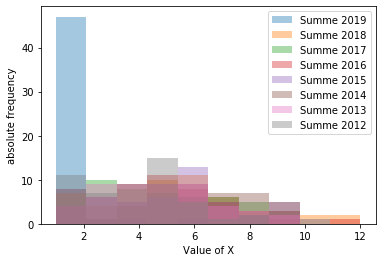

In [134]:
#Visualization of the absolute frequency of occurrence of the data
df_transpose[['Summe 2019','Summe 2018','Summe 2017','Summe 2016','Summe 2015', 'Summe 2014', 'Summe 2013', 'Summe 2012']].plot.hist(alpha=0.4)  # Plot at 40% opacity
plt.xlabel('Value of X')
plt.ylabel('absolute frequency')

Text(0, 0.5, 'absolute frequency')

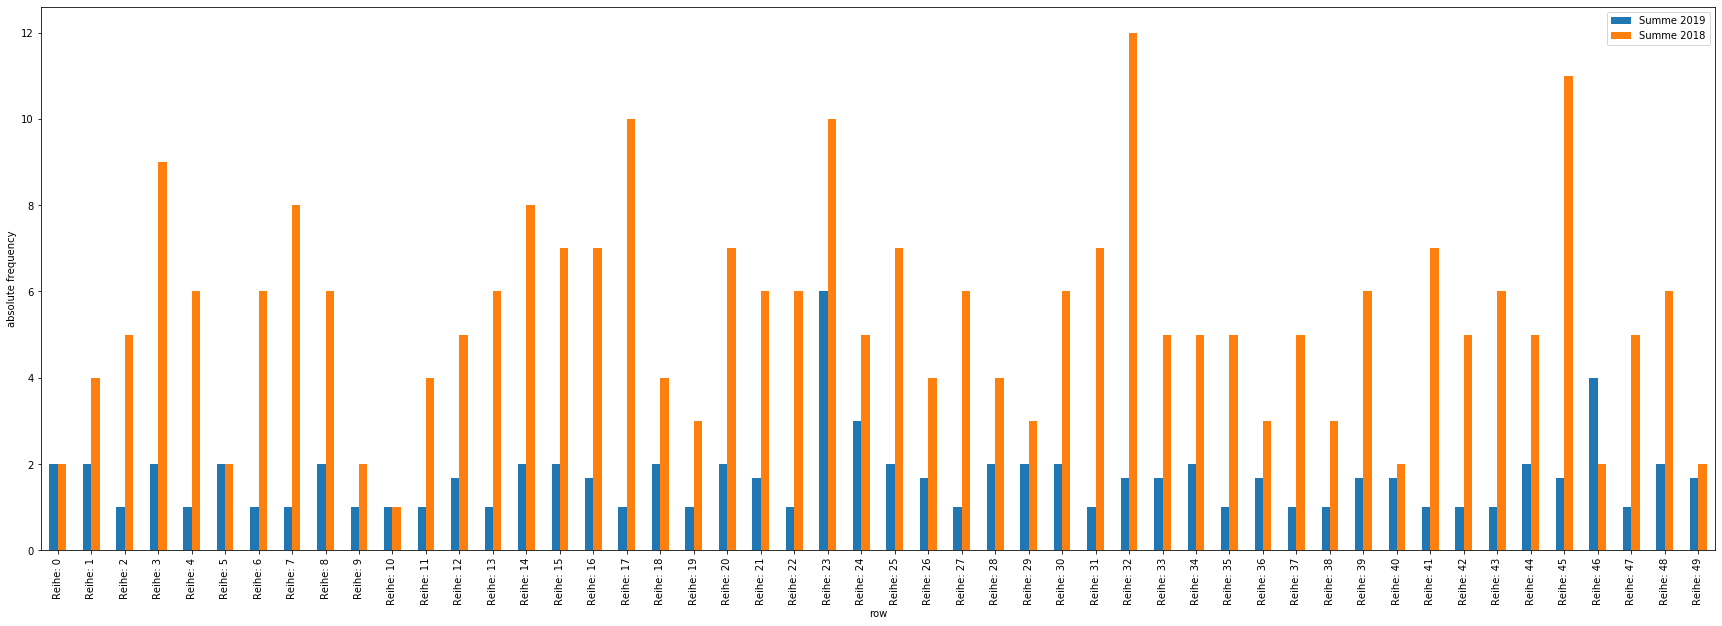

In [136]:
#Visualization to compare the absolute frequency of occurrence of the 
#data in a direct comparison of the test series after years.
df_transpose[['Summe 2019','Summe 2018']].plot(kind='bar', figsize=[30,10])
plt.xlabel('row')
plt.ylabel('absolute frequency')

In [98]:
#Building up a Contingency Table
df_transpose_extended = df_transpose
df_transpose_extended.loc['Jahres Summen (Spalten)']=df_transpose_extended.sum(axis=0)
df_transpose_extended.loc[:,'Reihen Summe (Zeilen)']=df_transpose_extended.sum(axis=1)
df_transpose_extended.head(52)

,Summe 2019,Summe 2018,Summe 2017,Summe 2016,Summe 2015,Summe 2014,Summe 2013,Summe 2012,Reihen Summe (Zeilen)
Reihe: 0,2.000000,2.0,6.000000,9.0,9.0,6.0,4.0,2.0,40.000000
Reihe: 1,2.000000,4.0,5.000000,4.0,3.0,6.0,5.0,1.0,30.000000
Reihe: 2,1.000000,5.0,8.000000,3.0,6.0,5.0,4.0,2.0,34.000000
Reihe: 3,2.000000,9.0,6.000000,7.0,4.0,6.0,8.0,2.0,44.000000
Reihe: 4,1.000000,6.0,3.000000,4.0,7.0,2.0,4.0,8.0,35.000000
Reihe: 5,2.000000,2.0,3.000000,6.0,2.0,8.0,9.0,4.0,36.000000
Reihe: 6,1.000000,6.0,5.000000,5.0,6.0,8.0,6.0,5.0,42.000000
Reihe: 7,1.000000,8.0,2.000000,2.0,6.0,7.0,3.0,6.0,35.000000
Reihe: 8,2.000000,6.0,4.000000,3.0,6.0,7.0,10.0,3.0,41.000000
Reihe: 9,1.000000,2.0,2.000000,11.0,1.0,8.0,7.0,5.0,37.000000


In [103]:
#Prepare the data for the ChiSquardTest by removing the last row and column.
#Goodes-Fit-Test
df_transpose_gof = df_transpose;
df_transpose_gof.head()
df_transpose_gof = df_transpose_gof.drop('Summe 2019', 1)
df_transpose_gof = df_transpose_gof.drop('Reihen Summe (Zeilen)', 1)
df_transpose_gof = df_transpose_gof.drop('Jahres Summen (Spalten)', 0)
df_transpose_gof.head(51)

np_df = df_transpose_gof.to_numpy()

In [120]:
#The following code parts were adopted from machine learning mastery (see link):
#https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

#The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) 
#that the observed frequencies for a categorical variable match the expected frequencies 
#for the categorical variable. The test calculates a statistic that has a chi-squared distribution, 
#named for the Greek capital letter Chi (X) pronounced “ki” as in kite.

#We want to analyze whether the data or the data collections are stochastically independent of each other:

stat, p_val, dof, expected = stats.chi2_contingency(np_df)
print('dof=%d' % dof)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(expected)
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p_val))
if p_val <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
########################################Summary##############################################################################
#Null hypothesis (H0): Two variables are independent.
#Alternative hypothesis (H1): Two variables are not independent.
#We were able to establish that we cannot reject the null hypothesis and can therefore 
#assume that the data series are stochastic.

dof=294
===Chi2 Stat===
273.25750832830295


===Degrees of Freedom===
294


===P-Value===
0.8019845924322682


===Contingency Table===
[[5.77823837 5.54804874 5.56501924 5.43708776 5.97013558 5.30915628
  4.39231403]
 [4.25764932 4.08803591 4.10054049 4.00627519 4.39904727 3.91200989
  3.23644192]
 [5.01794384 4.81804232 4.83277986 4.72168148 5.18459143 4.61058309
  3.81437798]
 [6.38647398 6.13205387 6.15081074 6.00941279 6.59857091 5.86801484
  4.85466288]
 [5.17000275 4.96404361 4.97922774 4.86476273 5.34170026 4.75029773
  3.92996519]
 [5.17000275 4.96404361 4.97922774 4.86476273 5.34170026 4.75029773
  3.92996519]
 [6.23441508 5.98605258 6.00436286 5.86633153 6.44146207 5.7283002
  4.73907567]
 [5.17000275 4.96404361 4.97922774 4.86476273 5.34170026 4.75029773
  3.92996519]
 [5.93029727 5.69405002 5.71146711 5.58016902 6.12724441 5.44887092
  4.50790125]
 [5.47412056 5.25604617 5.27212349 5.15092525 5.65591792 5.02972701
  4.16113961]
 [5.32206165 5.11004489 5.12567561 5.00784399 